In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sin,cos,pi
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.ensemble import BalancedBaggingClassifier
from matplotlib.colors import LinearSegmentedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn')

<ipython-input-1-03f97543ffc2>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
import datetime
def Time_Formatx(x):
    # Formatting Time

    if x == 2400:
        x = 0
    try: #Try to perform the conversion, except if there is an error.
        x = "{0:04d}".format(int(x))
        T = datetime.time(int(x[0:2]), int(x[2:4]))
    except ValueError: #Handle the ValueError
        print(f"Invalid time format: {x}") #Print the problematic value
        T = datetime.time(0, 0) # Or handle it in another way, perhaps return None.
    return T

def stats(g):
    # Statistical Information for a Group

    return {'mean':g.mean(), 'variance':g.var(), 'count':g.count(), 'min':g.min(), 'max':g.max()}


def dataOverview(Airlines, Airports, Flights):

    # Dataset descriptions
    print(Flights.info(verbose = True, show_counts=True))
    print(Airlines.info(verbose = True, show_counts=True))
    print(Airports.info(verbose = True, show_counts=True))

     # Cancellation Reasons

    cancelled = Flights['CANCELLATION_REASON']
    cancelled.dropna(inplace=True)
    cancelledCount = dict(cancelled.value_counts())
    labels = ['Weather','Airline','National Air System','Security']
    sizes = cancelledCount.values()

    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(sizes, labels=labels, pctdistance=1.25, labeldistance=1.45, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 20})
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


    # Cancellation Reasons

    cancelled = Flights['CANCELLATION_REASON']
    cancelled.dropna(inplace=True)
    cancelledCount = dict(cancelled.value_counts())
    sizes = [Flights[Flights['CANCELLED'] == 0].shape[0], Flights[Flights['CANCELLED'] == 1].shape[0]]
    labels = ['Not Cancelled', 'Cancelled']

    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(sizes, labels=labels, pctdistance=1.25, labeldistance=1.45, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 20})
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


    # Flights on Different Days of Week

    daysOfWeek = Flights['DAY_OF_WEEK']
    dayCounts = dict(daysOfWeek.value_counts())
    dayFreq = {}
    for day in sorted(dayCounts):
        dayFreq[day] = dayCounts[day]

    plt.figure(figsize=(12,8))
    flightFreq = list(dayFreq.values())
    flightFreq.append(dayFreq[1]) # add monday
    flightFreq.append(dayFreq[2]) # add tuesday
    days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon.','Tue...']
    plt.plot(days,flightFreq)
    plt.xlabel("Days of week", fontsize=16)
    plt.ylabel("No of flights", fontsize=16)
    plt.title("No of flights on days of week", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()


    # Flights in Different Months

    months = Flights['MONTH']
    monthCounts = dict(months.value_counts())
    monthFreq = {}
    for month in sorted(monthCounts):
        monthFreq[month] = monthCounts[month]

    plt.figure(figsize=(12,8))
    flightFreq = list(monthFreq.values())
    monthsArr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.plot(monthsArr, flightFreq)
    plt.xlabel("Months", fontsize=16)
    plt.ylabel("No of flights", fontsize=16)
    plt.title("No of flights on different months", fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()


    # Delay Threshold

    ttl = Flights.shape[0]
    threshold = 3
    delayLessThanThreshold = Flights[Flights['ARRIVAL_DELAY'] <= threshold].shape[0] / ttl
    print(delayLessThanThreshold)


def exploratoryDataAnalysis(df):

    # # Overall analysis

    # report = sv.analyze(df)
    # report.show_html("EDA.html")


    # Air Traffic Share of Airlines

    plt.subplots(figsize=(15,20))
    plt.pie(df['AIRLINE'].value_counts(),labels=df['AIRLINE_NAME'].unique(),autopct='%1.0f%%',textprops={'fontsize': 20})
    plt.show()


    # Calculating Data Statistics

    Origin_Stats = df['ARRIVAL_DELAY'].groupby(df['ORIGIN']).apply(stats).unstack().sort_values('count',ascending=False)
    Destination_Stats = df['ARRIVAL_DELAY'].groupby(df['DESTINATION']).apply(stats).unstack().sort_values('count',ascending=False)
    Airline_Stats = df['ARRIVAL_DELAY'].groupby(df['AIRLINE']).apply(stats).unstack().sort_values('mean')
    print(Airline_Stats)


    # Airline Delays on Different Days of Week

    Days = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    Airline_Day_Stats = pd.DataFrame()
    for a in df['AIRLINE'].unique():
        x = df[df['AIRLINE']==a]
        t = x['ARRIVAL_DELAY'].groupby(df['DAY']).mean()
        Airline_Day_Stats[a]=t
    Airline_Day_Stats.dropna(inplace=True)
    print(Airline_Day_Stats)

    sns.set(context="paper")
    plt.subplots(figsize=(10,8))
    plt.title("Mean Delay for Airline Vs. Day of Week")
    sns.heatmap(Airline_Day_Stats, linewidths=0.01, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256),robust=True,yticklabels=Days)
    plt.show()


    # Busiest airports and Airlines

    Airports = df['DESTINATION_CITY'].groupby(df["DESTINATION_CITY"]).count().sort_values(ascending=False).iloc[:11].keys().tolist()
    map = df[['AIRLINE_NAME','DESTINATION_CITY','ARRIVAL_DELAY']]

    frames = list()
    for x in Airports:
        frames.append(map.loc[map["DESTINATION_CITY"] == x])
    map = pd.concat(frames)

    airline_city_delay = pd.DataFrame()
    for airlines in map["AIRLINE_NAME"].unique():
        t = map.loc[map["AIRLINE_NAME"] == airlines]
        temp = t["ARRIVAL_DELAY"].groupby(t["DESTINATION_CITY"]).mean()
        airline_city_delay[airlines] = temp

    sns.set(context="paper")
    plt.subplots(figsize=(10,8))
    plt.title("Mean Delay for Airline Vs. Destination Airports")
    sns.heatmap(airline_city_delay, linewidths=0.01, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256),robust=True,yticklabels=Airports)
    plt.show()


    # Distance and Delay

    map = df[["DISTANCE","ARRIVAL_DELAY","AIRLINE_NAME"]].copy()
    interval = list()
    for i in range(0,5000,100):
        interval.append(i)

    map["DISTANCE_INTERVAL"] = pd.cut(x = map["DISTANCE"], bins = interval)
    map["DISTANCE_MID"] = map["DISTANCE_INTERVAL"].apply(lambda x : x.mid)
    newMap = map["ARRIVAL_DELAY"].groupby(map["DISTANCE_MID"]).mean().to_frame()
    newMap.dropna(inplace=True)
    newMap.plot.line(title = "Distance vs Delay graph (Bucket Size:100)")
    plt.show()


    # Distribution of Arrival Delay

    sns.displot(df['ARRIVAL_DELAY'], bins = [i for i in range(-50,100)])
    plt.show()


def preprocess(analysis = False):

    Airlines = pd.read_csv('/content/gdrive/MyDrive/FlightDelayDataset/airlines.csv')
    Airports = pd.read_csv('/content/gdrive/MyDrive/FlightDelayDataset/airports.csv')
    Flights  = pd.read_csv('/content/gdrive/MyDrive/FlightDelayDataset/flights.csv', on_bad_lines='skip')

    if analysis:
        dataOverview(Airlines, Airports, Flights)


    # Dropping rows with NaN values and selecting data for January

    Flights = Flights.iloc[:,:23]
    Flights.dropna(inplace=True)
    Flights = Flights[Flights["MONTH"]==1]
    Flights.reset_index(inplace=True)


    # Collecting Names of Airlines and Airports

    Airline_Names = {}
    for i in range(len(Airlines)):
        Airline_Names[Airlines["IATA_CODE"][i]] = Airlines["AIRLINE"][i]

    Airport_Names = {}
    for i in range(len(Airports)):
        Airport_Names[Airports["IATA_CODE"][i]] = Airports["AIRPORT"][i]

    City_Names = {}
    for i in range(len(Airports)):
        City_Names[Airports["IATA_CODE"][i]] = Airports["CITY"][i]


    # Merging Datasets & Selecting relevant columns

    df = pd.DataFrame()
    df['DATE'] = pd.to_datetime(Flights[['YEAR','MONTH', 'DAY']])
    df['DAY'] = Flights["DAY_OF_WEEK"]
    df['AIRLINE'] = Flights["AIRLINE"]
    df['AIRLINE_NAME'] = [Airline_Names[Flights["AIRLINE"][x]] for x in range(len(Flights))]
    df['FLIGHT_NUMBER'] = Flights['FLIGHT_NUMBER']
    df['TAIL_NUMBER'] = Flights['TAIL_NUMBER']
    df['ORIGIN'] = Flights['ORIGIN_AIRPORT']
    df['ORIGIN_AIRPORT_NAME'] = [Airport_Names[Flights["ORIGIN_AIRPORT"][x]] for x in range(len(Flights))]
    df['ORIGIN_CITY'] = [City_Names[Flights["ORIGIN_AIRPORT"][x]] for x in range(len(Flights))]
    df['DESTINATION'] = Flights['DESTINATION_AIRPORT']
    df['DESTINATION_AIRPORT_NAME'] = [Airport_Names[Flights["DESTINATION_AIRPORT"][x]] for x in range(len(Flights))]
    df['DESTINATION_CITY'] = [City_Names[Flights["DESTINATION_AIRPORT"][x]] for x in range(len(Flights))]
    df['DISTANCE'] = Flights['DISTANCE']
    df['SCHEDULED_DEPARTURE'] = Flights['SCHEDULED_DEPARTURE'].apply(Time_Formatx)
    df['SCHEDULED_ARRIVAL'] = Flights['SCHEDULED_ARRIVAL'].apply(Time_Formatx)
    df['TAXI_OUT'] = Flights['TAXI_OUT']
    df['DEPARTURE_DELAY'] = Flights['DEPARTURE_DELAY']
    df['ARRIVAL_DELAY'] = Flights['ARRIVAL_DELAY']
    df = df[df.ARRIVAL_DELAY < 500]

    if analysis:
        print(df)

    if analysis:
        exploratoryDataAnalysis(df)

    # Selecting Features
    Data = df[['ARRIVAL_DELAY','ORIGIN','DESTINATION','DISTANCE','TAXI_OUT','DEPARTURE_DELAY','DATE','DAY','AIRLINE','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL']].copy()


    # Handling Date and Time Data

    SD = Data['SCHEDULED_DEPARTURE']
    SA = Data['SCHEDULED_ARRIVAL']
    DA = Data['DATE']

    Data['SDH_Sin'] = [sin(2*pi*d.hour/24) for d in SD]
    Data['SDH_Cos'] = [cos(2*pi*d.hour/24) for d in SD]
    Data['SDM_Sin'] = [sin(2*pi*d.minute/60) for d in SD]
    Data['SDM_Cos'] = [cos(2*pi*d.minute/60) for d in SD]

    Data['SAH_Sin'] = [sin(2*pi*d.hour/24) for d in SA]
    Data['SAH_Cos'] = [cos(2*pi*d.hour/24) for d in SA]
    Data['SAM_Sin'] = [sin(2*pi*d.minute/60) for d in SA]
    Data['SAM_Cos'] = [cos(2*pi*d.minute/60) for d in SA]

    Data['DAM_Sin'] = [sin(2*pi*d.month/12) for d in DA]
    Data['DAM_Cos'] = [cos(2*pi*d.month/12) for d in DA]
    Data['DAD_Sin'] = [sin(2*pi*d.day/31) for d in DA]
    Data['DAD_Cos'] = [cos(2*pi*d.day/31) for d in DA]

    Data = Data.drop(['SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','DATE'],axis=1)
    Data.dropna(inplace=True)
    Data.reset_index(inplace=True,drop=True)

    if analysis:
        print(Data)


    # Handling Categorical Variables

    L = LabelEncoder()

    Data['AIRLINE']=L.fit_transform(np.array(Data['AIRLINE']).reshape(-1,1))
    Data['ORIGIN']=L.fit_transform(np.array(Data['ORIGIN']).reshape(-1,1))
    Data['DESTINATION']=L.fit_transform(np.array(Data['DESTINATION']).reshape(-1,1))

    H = OneHotEncoder()

    a = pd.DataFrame(H.fit_transform(np.array(Data['AIRLINE']).reshape(-1,1)).toarray())
    a.columns = [str(i) for i in range(len(a.columns))]
    b = pd.DataFrame(H.fit_transform(np.array(Data['ORIGIN']).reshape(-1,1)).toarray())
    b.columns = [str(i+len(a.columns)) for i in range(len(b.columns))]
    c = pd.DataFrame(H.fit_transform(np.array(Data['DESTINATION']).reshape(-1,1)).toarray())
    c.columns = [str(i+len(a.columns)+len(b.columns)) for i in range(len(c.columns))]

    Data = Data.drop(['AIRLINE'],axis=1)
    Data = Data.join(a)
    #Data = Data.drop(['ORIGIN'],axis=1)
    #Data = Data.join(b)
    #Data = Data.drop(['DESTINATION'],axis=1)
    #Data = Data.join(c)
    Data.dropna(inplace=True)

    if analysis:
        print(Data)


    # Splitting into X and Y

    X = Data.copy()
    X.drop(['ARRIVAL_DELAY'],axis=1, inplace = True)
    Y = Data['ARRIVAL_DELAY'].copy()

    for i in range(len(Y)):
        if Y[i]<3: Y[i]=0
        else: Y[i]=1

    X = X.to_numpy()
    Y = Y.to_numpy()

    if analysis:
        print("X shape: ", X.shape)
        print("Y shape: ", Y.shape)


    # Splitting into Train, Val, Test

    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0, stratify = Y)
    X_val, X_test, y_val, y_test = train_test_split( X_test, y_test, test_size=0.66, random_state=0, stratify = y_test)

    if analysis:
        print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
        print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")


    # Standard Scaling

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, y_train, X_val, y_val, X_test, y_test


def train(model, X_train, y_train, X_val, y_val, X_test, y_test, params):

    # Decision Tree
    if model == "dt":
        dt = DecisionTreeClassifier(**params)
        dt.fit(X_train,y_train)
        y_pred = dt.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = dt.score(X_test,y_test)
        print("Test Score:", score)

        sns.set(context="paper")
        plt.subplots(figsize=(6,6))
        sns.heatmap(confusionMatrix, annot=True, fmt=".0f", linewidths=1.5, square = True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title("Confusion Matrix", size = 15)
        plt.show()

        return dt

    # Logistic Regression
    if model == "logistic":

        logistic = LogisticRegression(**params)
        logistic.fit(X_train,y_train)
        y_pred = logistic.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = logistic.score(X_test,y_test)
        print("Test Score:", score)

        sns.set(context="paper")
        plt.subplots(figsize=(6,6))
        sns.heatmap(confusionMatrix, annot=True, fmt=".0f", linewidths=1.5, square = True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title("Confusion Matrix", size = 15)
        plt.show()

        return logistic

    # SGD Classifier
    if model == "sgd classifier":

        sgd = SGDClassifier(**params)
        sgd.fit(X_train,y_train)
        y_pred = sgd.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = sgd.score(X_test,y_test)
        print("Test Score:", score)

        sns.set(context="paper")
        plt.subplots(figsize=(6,6))
        sns.heatmap(confusionMatrix, annot=True, fmt=".0f", linewidths=1.5, square = True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title("Confusion Matrix", size = 15)
        plt.show()

        return sgd

    # Random Forests
    if model == "rf":

        rf = RandomForestClassifier(**params)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = rf.score(X_test,y_test)
        print("Test Score:", score)

        sns.set(context="paper")
        plt.subplots(figsize=(6,6))
        sns.heatmap(confusionMatrix, annot=True, fmt=".0f", linewidths=1.5, square = True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title("Confusion Matrix", size = 15)
        plt.show()

        return rf

    # Gaussian Naive Bayes
    if model == "gnb":

        gnb = GaussianNB(**params)
        gnb.fit(X_train,y_train)
        y_pred = gnb.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = gnb.score(X_test,y_test)
        print("Test Score:", score)

        sns.set(context="paper")
        plt.subplots(figsize=(6,6))
        sns.heatmap(confusionMatrix, annot=True, fmt=".0f", linewidths=1.5, square = True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title("Confusion Matrix", size = 15)
        plt.show()

        return gnb

    # XGBoost Classifier
    if model == "xgb":

        xgb = XGBClassifier(**params)
        xgb.fit(X_train,y_train)
        y_pred = xgb.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = xgb.score(X_test,y_test)
        print("Test Score:", score)

        sns.set(context="paper")
        plt.subplots(figsize=(6,6))
        sns.heatmap(confusionMatrix, annot=True, fmt=".0f", linewidths=1.5, square = True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title("Confusion Matrix", size = 15)
        plt.show()

        importance = xgb.feature_importances_

        for i in range(len(importance)):
            print("Feature: {:d}, Score: {:.3f}".format(i,importance[i]))

        plt.bar([x for x in range(len(importance))], importance)
        plt.show()

        return xgb


def optimalParams(model, X_train, y_train, X_val, y_val, X_test, y_test):
    '''
    Enter the parameter and it's possible types here
    If max_depth = 10,100,1000 and loss = L1,L2
    The code will run 3*2 times.
    For plotting the graph, please keep only 2 sets of parameters as it's a 2D graph.
    Otherwise one would have to split the array and it will lead to confusion.
    '''

    # # Logistic Regression
    if model == "logistic":

        parameters = {
            'penalty': ['l2'],
            'fit_intercept': [True, False],
            'max_iter': [2,4,6,8,10],
            'n_jobs': [-1]}

        clf = GridSearchCV(LogisticRegression(), parameters, n_jobs=-1, cv=3)
        clf.fit(X_train,y_train)
        print("Best Score:", clf.best_score_)
        print("Best Parameters:", clf.best_params_)

        bestEstimator = clf.best_estimator_
        y_pred = bestEstimator.predict(X_test)
        score = bestEstimator.score(X_test,y_test)
        print("Test Score:", score)


        # Plotting the parameters

        param_xAxis_name = 'max_iter' # parameter that you want in the x axis. (max_iter, n_estimators etc. are preferred)
        param_color_name = 'fit_intercept' # parameter that you want as the different colored curves

        param_xAxis = parameters[param_xAxis_name]
        param_color = parameters[param_color_name]

        mean_test_score = clf.cv_results_['mean_test_score']
        mean_test_score = np.array(mean_test_score).reshape(len(param_color), len(param_xAxis))

        _, ax = plt.subplots(1,1, figsize=(9,6))

        for i in range(len(param_color)):
            ax.plot(param_xAxis, mean_test_score[i,:], label=param_color_name+': ' + str(param_color[i]))

        ax.set_title("Grid Search CV Scores for Logistic Regression", fontsize=18, fontweight='bold')
        ax.set_xlabel(param_xAxis_name, fontsize=14)
        ax.set_ylabel('CV Avg Score', fontsize=14)
        ax.legend(fontsize=14)
        # plt.show()

    # Random Forests
    if model == "rf":

        parametersrf = {
            'criterion': ["gini", "entropy"],
            'class_weight': [None, "balanced"],
            'n_estimators': [200,400,600]
            }

        clf = GridSearchCV(RandomForestClassifier(), parametersrf, n_jobs=-1, cv=3)
        clf.fit(X_train,y_train)
        print("Best Score:", clf.best_score_)
        print("Best Parameters:", clf.best_params_)
        bestEstimatorrf = clf.best_estimator_

        y_pred = bestEstimatorrf.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = bestEstimatorrf.score(X_test,y_test)
        print("Test Score:", score)

        param_xAxis_name = 'n_estimators' # parameter that you want in the x axis. (max_iter, n_estimators etc. are preferred)
        param_color_name = 'criterion' # parameter that you want as the different colored curves

        param_xAxis = parametersrf[param_xAxis_name]
        param_color = parametersrf[param_color_name]
        param_label = parameters["class_weight"]
        mean_test_score = clf.cv_results_['mean_test_score']
        mean_test_score_none = mean_test_score[:len(mean_test_score)//2]
        mean_test_score_bal = mean_test_score[len(mean_test_score)//2:]
        mean_test_score_none = np.array(mean_test_score_none).reshape(len(param_color), len(param_xAxis))
        mean_test_score_bal = np.array(mean_test_score_bal).reshape(len(param_color), len(param_xAxis))


        _, ax = plt.subplots(1,1, figsize=(9,6))

        for i in range(len(param_color)):
            ax.plot(param_xAxis, mean_test_score_none[i,:], label=param_color_name+': ' + str(param_color[i]) + ", class weight:" + str(param_label[i]))
            ax.plot(param_xAxis, mean_test_score_bal[i,:], label=param_color_name+': ' + str(param_color[i]) + ", class weight:" + str(param_label[i]))

        ax.set_title("Grid Search CV Scores for Random Forest Classifier", fontsize=18, fontweight='bold')
        ax.set_xlabel(param_xAxis_name, fontsize=14)
        ax.set_ylabel('CV Avg Score', fontsize=14)
        ax.legend(fontsize=14, bbox_to_anchor=(1.05, 1), title = "Criterion, class weight")
        plt.setp(legend.get_title(),fontsize='x-large')
        # plt.show()


    # Gaussian Naive Bayes
    if model == "gnb":

        parametersnb = {
            "var_smoothing": [10**-20,10**-11,10**-9, 10**-7, 10**-5, 10**-2]
            }

        clf = GridSearchCV(GaussianNB(), parametersnb, n_jobs=-1, cv=3)
        clf.fit(X_train,y_train)
        print("Best Score:", clf.best_score_)
        print("Best Parameters:", clf.best_params_)
        bestEstimatornb = clf.best_estimator_
        y_pred = bestEstimatornb.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        print(confusionMatrix)
        scorenb = bestEstimatornb.score(X_test,y_test)
        print("Test Score:", scorenb)

        param_xAxis_name = 'var_smoothing' # parameter that you want in the x axis. (max_iter, n_estimators etc. are preferred)
        param_xAxis = parameters[param_xAxis_name]
        param_label = parameters[param_xAxis_name]
        print(clf.cv_results_["params"])
        mean_test_score = clf.cv_results_['mean_test_score']

        _, ax = plt.subplots(1,1, figsize=(9,6))

        ax.plot(param_xAxis, mean_test_score)
        ax.set_title("Grid Search CV Scores for Gaussian naive bayes", fontsize=18, fontweight='bold')
        ax.set_xlabel(param_xAxis_name, fontsize=14)
        ax.set_ylabel('CV Avg Score', fontsize=14)
        # plt.show()


    # XGBoost Classifier
    if model == "xgb":

        parameters = {
            'max_depth':[5,7,15],
            'learning_rate': [0.01,0.001,0.1],
            'class_weight': [None, "balanced"],
            'n_estimators': [100,200,300]
            }

        clf = GridSearchCV(XGBClassifier(), parameters, n_jobs=-1, cv=3)
        clf.fit(X_train,y_train)
        print("Best Score:", clf.best_score_)
        print("Best Parameters:", clf.best_params_)
        bestEstimator = clf.best_estimator_
        y_pred = bestEstimator.predict(X_test)

        confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
        score = bestEstimator.score(X_test,y_test)
        print("Test Score:", score)

        # Plotting the parameters

        param_xAxis_name = 'n_estimators' # parameter that you want in the x axis. (max_iter, n_estimators etc. are preferred)
        param_color_name = 'max_depth' # parameter that you want as the different colored curves

        param_xAxis = parameters[param_xAxis_name]
        param_color = parameters[param_color_name]
        param_breaks = clf.cv_results_["params"]
        mean_score = clf.cv_results_["mean_test_score"]
        scores_list = [[] for i in range(6)]
        j, k = len(param_xAxis)*len(param_color), 0
        labels = dict()
        for i in param_breaks:
            scores_list[k//j].append(mean_score[k])
            labels["learning_rate:"+str(clf.cv_results_["params"][k]["learning_rate"]) + ", class_weight:"+str(clf.cv_results_["params"][k]["class_weight"])] = k//j
            k += 1

        labels = {v: k for k, v in labels.items()}
        mean_test_score = np.array(scores_list).reshape(len(scores_list), len(param_color), len(param_xAxis))

        _, ax = plt.subplots(1,1, figsize=(9,6))

        for i in range(len(param_color)):
            for j in range(len(mean_test_score)):
                ax.plot(param_xAxis, mean_test_score[j,i,:], label=param_color_name+': ' + str(param_color[i]) + "," + labels[j])


        ax.set_title("Grid Search CV Scores for XGB Classifier", fontsize=18, fontweight='bold')
        ax.set_xlabel(param_xAxis_name, fontsize=14)
        ax.set_ylabel('CV Avg Score', fontsize=14)
        ax.legend(fontsize=14,  bbox_to_anchor=(1, 1.1), title = "max depth, learning rate, class weight")
        plt.setp(legend.get_title(),fontsize='x-large')
        # plt.show()

    return clf

def plotRocAuc(model, X_test, y_test, labels):

    y_pred = model.predict_proba(X_test)

    fpr, tpr, threshold= metrics.roc_curve(y_test, y_pred[:, 1])
    roc_auc = metrics.auc(fpr, tpr)

    plt.subplots(figsize=(9,7))
    plt.title("Receiver Operating Characteristic", fontsize=14)
    plt.plot(fpr, tpr, label = labels + " AUC = %0.2f"%roc_auc)
    plt.plot([0,1], [0,1], "--", label="No skill")
    plt.legend(loc = "lower right", prop={'size': 12})
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

    plt.show()

def process(analysis = False):
    '''
      Calls preprocess on the train and test set - Link to the dataset : https://drive.google.com/drive/folders/1HRDxih_6xN0uU2Js3xGF8zp5r_XPSEJc?usp=sharing

      Parameters
      ----------
      analysis : Default False, If set to true, displays all the analytical & statistical graphs for the dataset provided.

      Returns
      -------
      A stratified 70-10-20 split of the dataset
    '''
    X_train, y_train, X_val, y_val, X_test, y_test = preprocess(analysis)
    return X_train, y_train, X_val, y_val, X_test, y_test

def plotAllROC(data):
    X_train, y_train, X_val, y_val, X_test, y_test = data
    models = ['logistic',
              'gnb',
              'xgb',
              'dt',
              'rf']
    params = [{},
              {},
              {'class_weight': None, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, "random_state": 42},
              {"random_state": 42},
              {'class_weight': None, 'criterion': 'entropy', 'n_estimators': 400, "random_state": 42}]
    labels = ["Logistic Regression",
              "GNB",
              "XGB Classifier",
              "Decision Tree",
              "Random Forest"]

    tpr, fpr, roc_auc = [], [], []

    for i in range(len(models)):
        print(i)
        trainedModel = train(models[i], X_train, y_train, X_val, y_val, X_test, y_test, params[i])

        y_pred = trainedModel.predict_proba(X_test)
        fpr_, tpr_, threshold= metrics.roc_curve(y_test, y_pred[:, 1])
        fpr.append(fpr_)
        tpr.append(tpr_)
        roc_auc_ = metrics.auc(fpr_, tpr_)
        roc_auc.append(roc_auc_)

    plt.clf()
    plt.subplots(figsize=(9,6))

    for i in range(len(models)):
      plt.plot(fpr[i], tpr[i], label = labels[i] + " AUC = %0.2f"%roc_auc[i])
    plt.plot([0,1], [0,1], "--", label="No skill")

    plt.title("Receiver Operating Characteristic", fontsize=14, fontweight = "bold")
    plt.legend(loc = "lower right", prop={'size': 12})
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

    plt.show()

def runner(model, data, optimal = False, params = {}):
    '''
      Trains the models, Plots confusion matrix and roc-auc curve.

      Parameters
      ----------
      model : {
        'logistic' : logistic regression model
        'rf' : Random forest
        'gnb' : Gaussian naive bayes
        'xgb' : XGB boost
        'dt' : Decision tree
      }
      optimal : Default False, If set to true, performs a grid search on predetermined hyperparameters and trains the model based on those parameters
      params : parameters that you want to pass to the model - Default is an empty dictionary. If optimal set to true, there is no need to pass params

    Returns
    ------
    None, but accuracy is printed
    '''
    modelDict = {
        'logistic' : "Logistic Regression",
        'rf' : "Random Forest",
        'gnb' : "GNB",
        'xgb' : "XGB Classifier",
        'dt' : "Decision Tree"
      }
    X_train, y_train, X_val, y_val, X_test, y_test = data
    if optimal:
        trainedModel = optimalParams(model, X_train, y_train, X_val, y_val, X_test, y_test)
    else:
        trainedModel = train(model, X_train, y_train, X_val, y_val, X_test, y_test, params)

    plotRocAuc(trainedModel, X_test, y_test, modelDict[model])

<ipython-input-14-0b05dbc0d8be>:193: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  Flights  = pd.read_csv('/content/gdrive/MyDrive/FlightDelayDataset/flights.csv', on_bad_lines='skip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

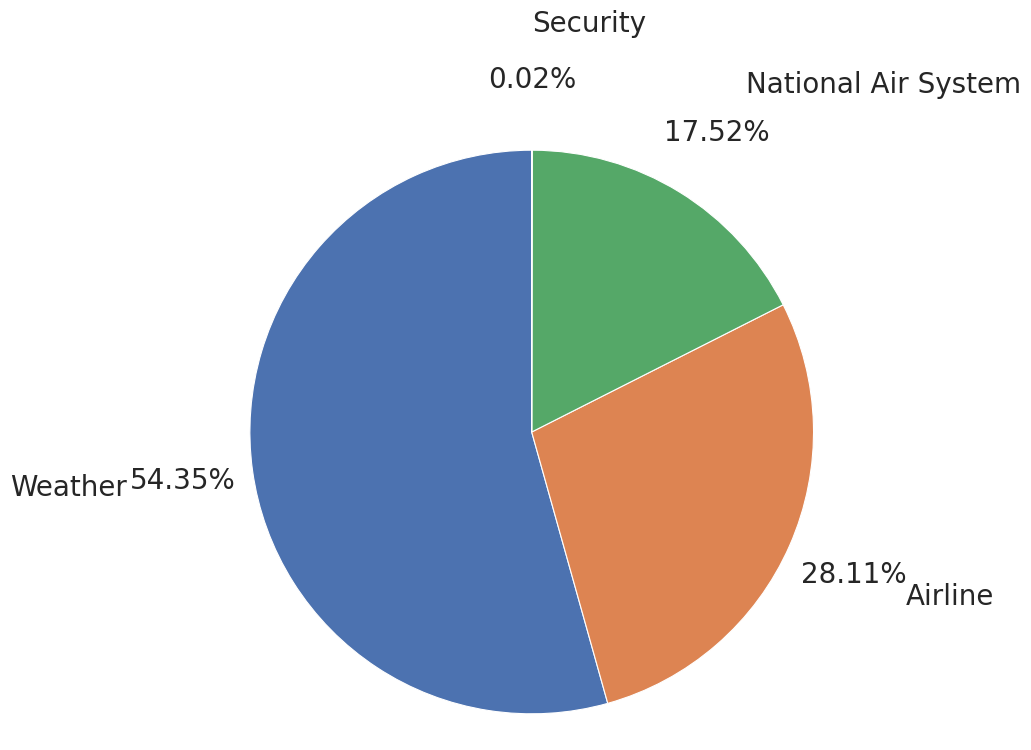

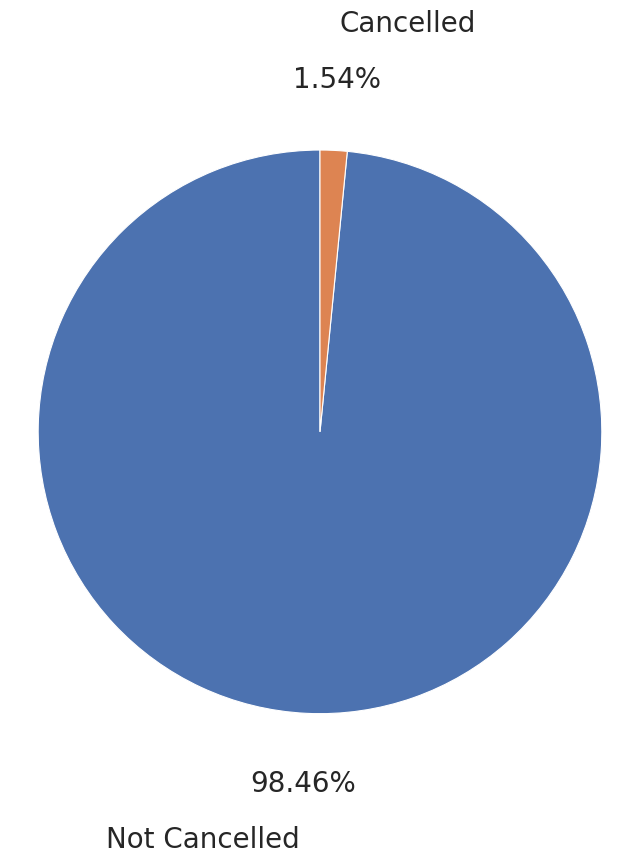

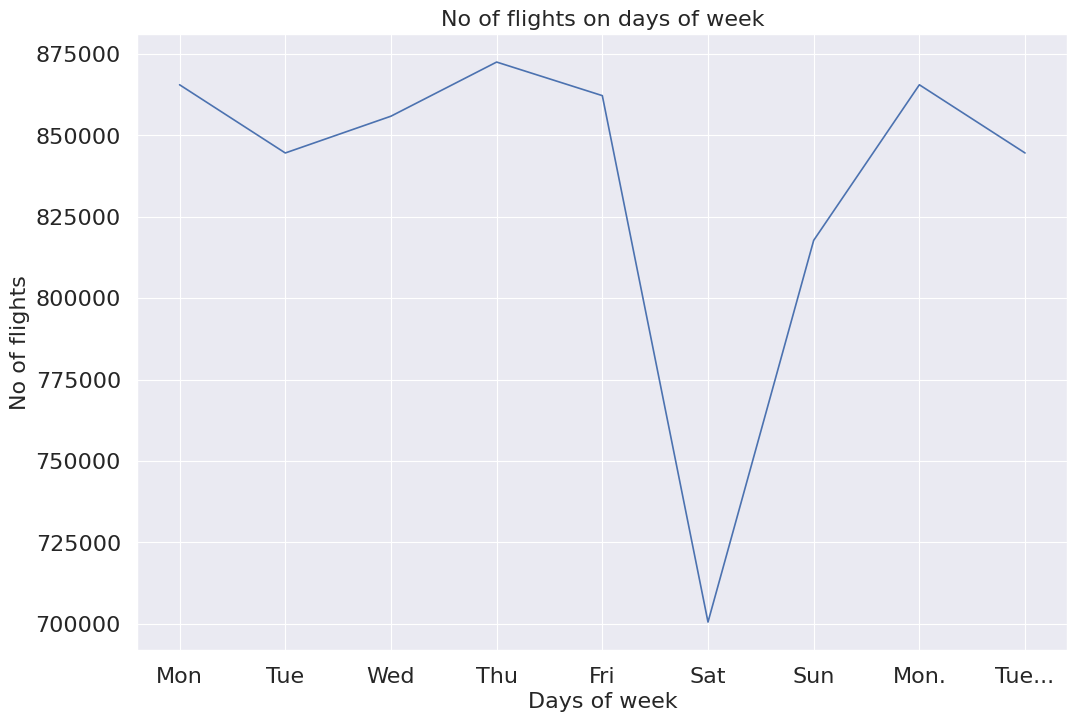

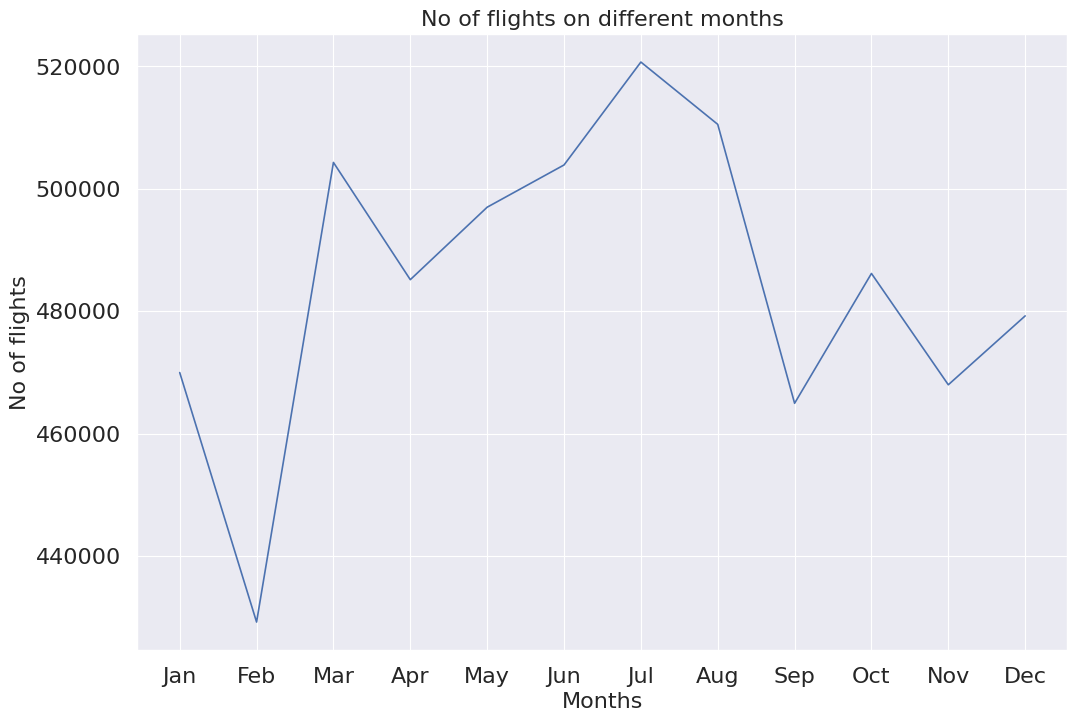

0.6780059181186576
             DATE  DAY AIRLINE            AIRLINE_NAME  FLIGHT_NUMBER  \
0      2015-01-01    4      AS    Alaska Airlines Inc.             98   
1      2015-01-01    4      AA  American Airlines Inc.           2336   
2      2015-01-01    4      US         US Airways Inc.            840   
3      2015-01-01    4      AA  American Airlines Inc.            258   
4      2015-01-01    4      AS    Alaska Airlines Inc.            135   
...           ...  ...     ...                     ...            ...   
457008 2015-01-31    6      B6         JetBlue Airways            839   
457009 2015-01-31    6      DL    Delta Air Lines Inc.           1887   
457010 2015-01-31    6      F9  Frontier Airlines Inc.            300   
457011 2015-01-31    6      F9  Frontier Airlines Inc.            422   
457012 2015-01-31    6      UA   United Air Lines Inc.           1104   

       TAIL_NUMBER ORIGIN                                ORIGIN_AIRPORT_NAME  \
0           N407AS    AN

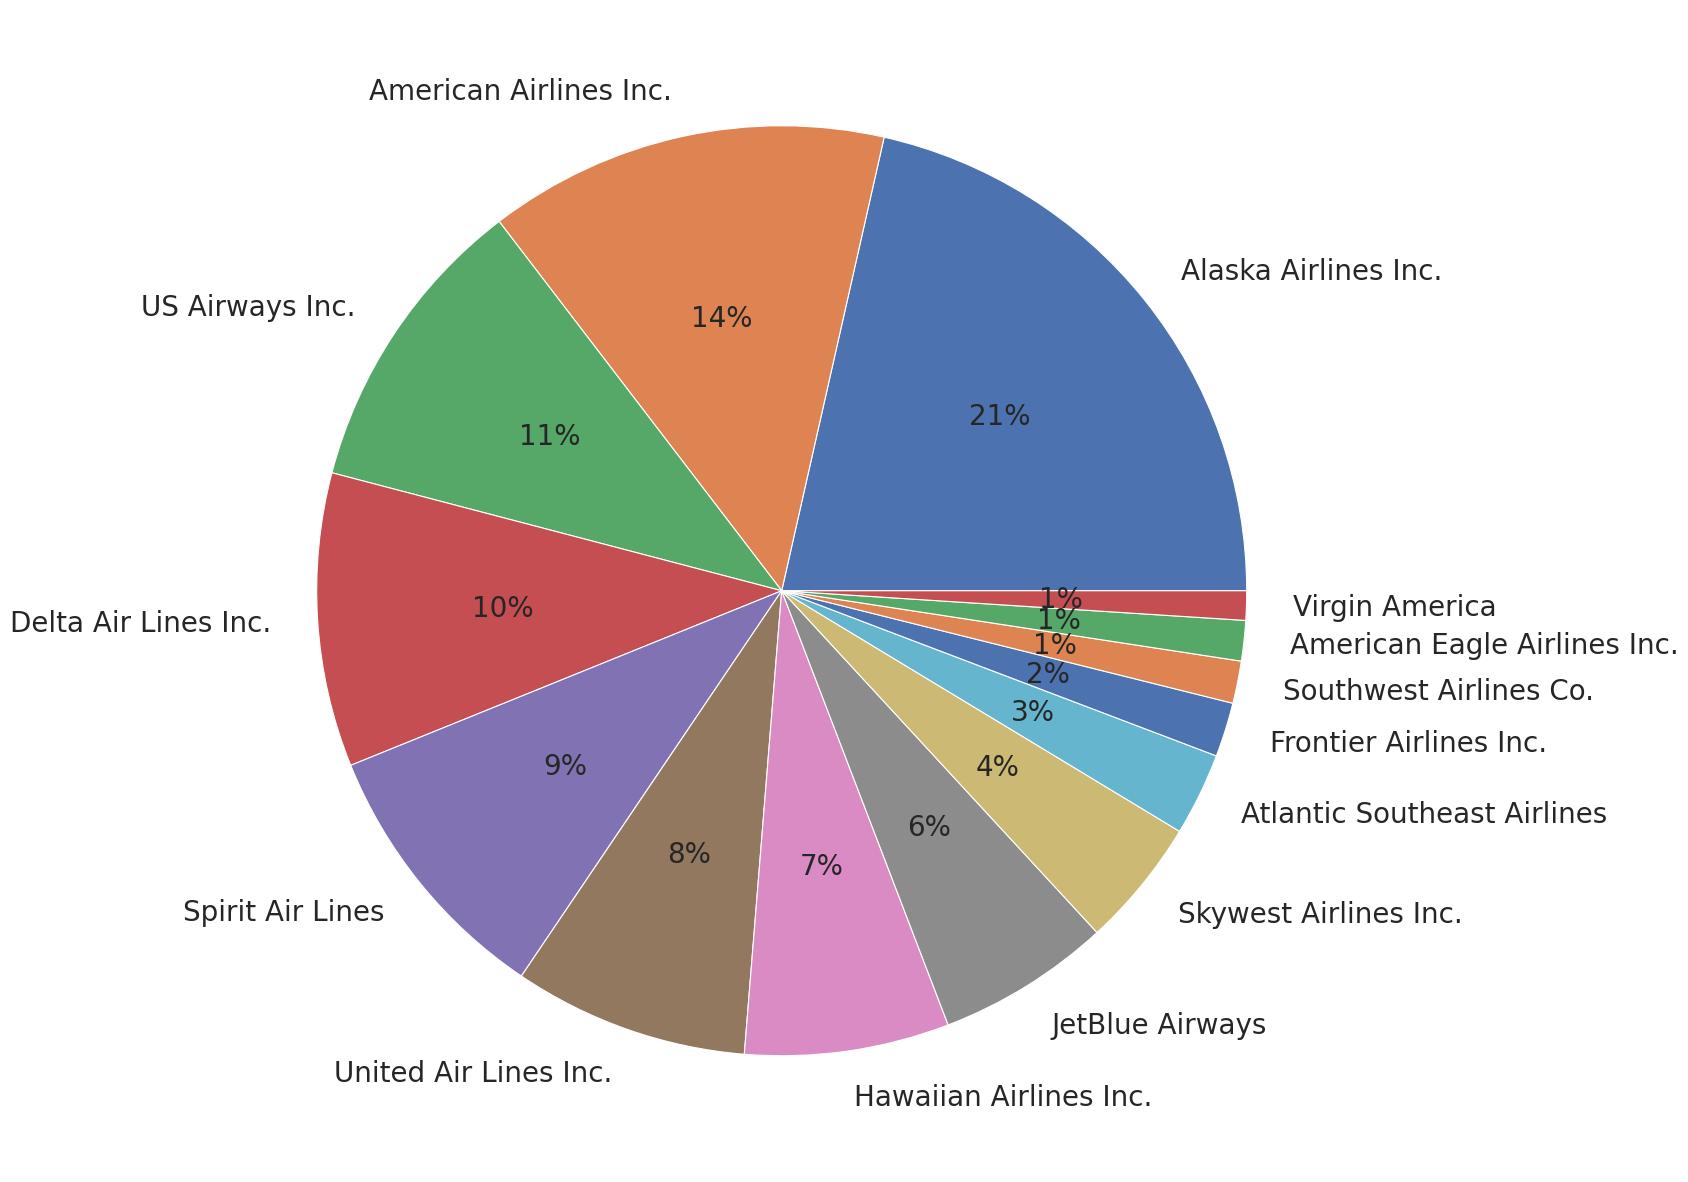

              mean     variance    count   min    max
AIRLINE                                              
DL       -2.447386   947.445375  63643.0 -72.0  491.0
AS       -0.320888   972.458088  13151.0 -82.0  451.0
VX        1.420702  1093.283368   4647.0 -70.0  384.0
US        3.055889   892.031643  32475.0 -67.0  391.0
HA        3.224009   407.472841   6406.0 -52.0  288.0
WN        3.378031   904.806508  98058.0 -63.0  495.0
AA        5.850545  1319.580982  43023.0 -69.0  498.0
UA        6.152637  1578.022298  37350.0 -69.0  474.0
B6        7.323129  1373.844020  20481.0 -76.0  419.0
EV        8.408129  1654.781630  48073.0 -60.0  499.0
OO       10.691552  1845.370756  46640.0 -57.0  491.0
NK       11.154613  1713.248609   8628.0 -59.0  484.0
F9       17.132589  2535.237813   6720.0 -47.0  477.0
MQ       17.999601  2200.488153  27560.0 -60.0  493.0
           AS         AA        US        DL         NK         UA         HA  \
DAY                                                    

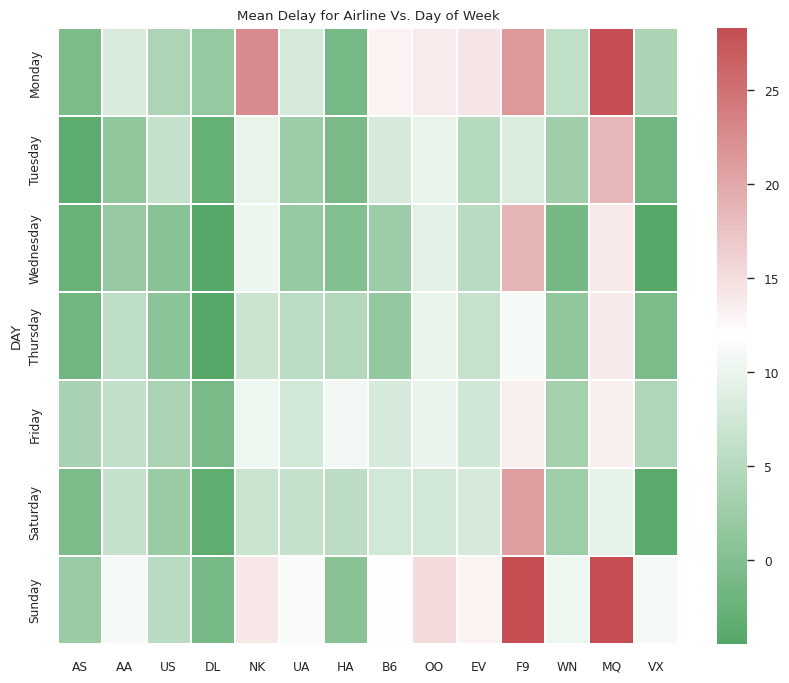

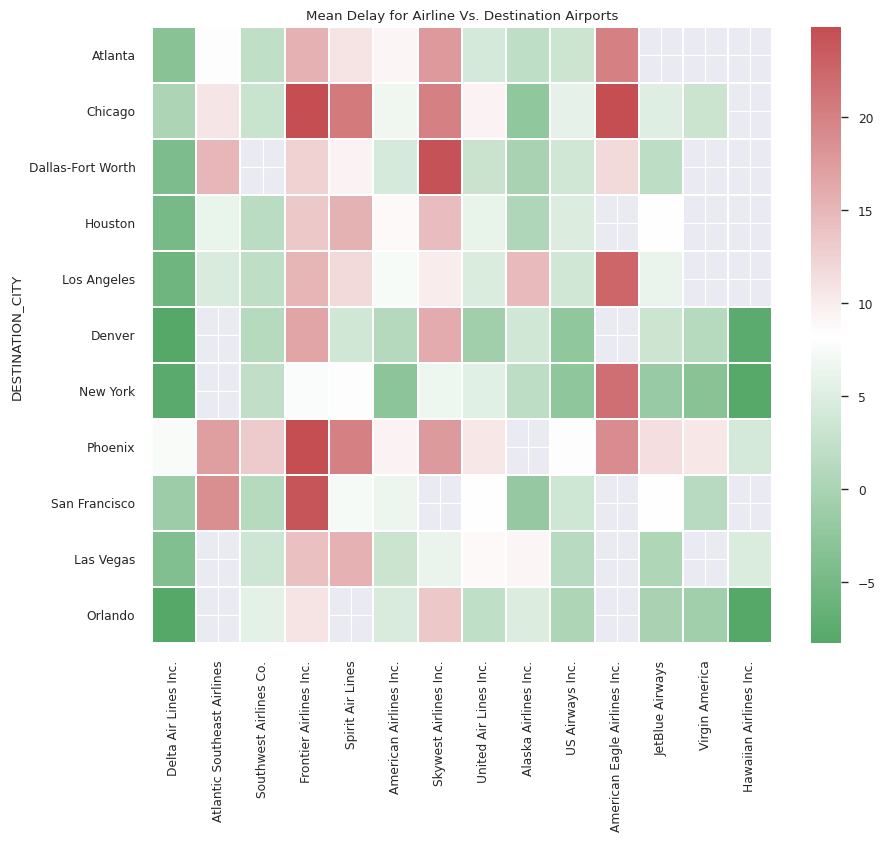

<ipython-input-14-0b05dbc0d8be>:177: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  newMap = map["ARRIVAL_DELAY"].groupby(map["DISTANCE_MID"]).mean().to_frame()


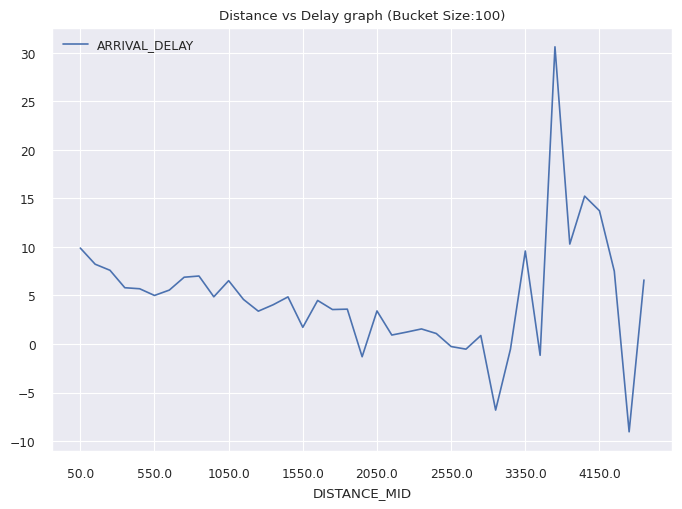

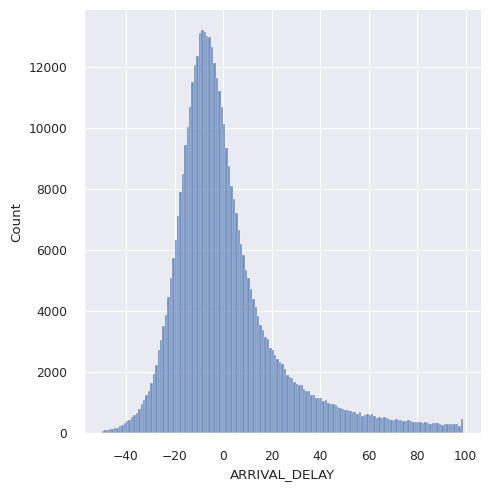

        ARRIVAL_DELAY ORIGIN DESTINATION  DISTANCE  TAXI_OUT  DEPARTURE_DELAY  \
0               -22.0    ANC         SEA      1448      21.0            -11.0   
1                -9.0    LAX         PBI      2330      12.0             -8.0   
2                 5.0    SFO         CLT      2296      16.0             -2.0   
3                -9.0    LAX         MIA      2342      15.0             -5.0   
4               -21.0    SEA         ANC      1448      11.0             -1.0   
...               ...    ...         ...       ...       ...              ...   
456850          -21.0    JFK         BQN      1576      18.0              0.0   
456851          -13.0    SEA         DTW      1927      16.0              0.0   
456852           23.0    DEN         TPA      1506      35.0              3.0   
456853           29.0    DEN         ATL      1199      40.0              0.0   
456854            2.0    ANC         DEN      2405      23.0             -1.0   

        DAY AIRLINE   SDH_S

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        ARRIVAL_DELAY  ORIGIN  DESTINATION  DISTANCE  TAXI_OUT  \
0               -22.0      15          268      1448      21.0   
1                -9.0     168          226      2330      12.0   
2                 5.0     269           62      2296      16.0   
3                -9.0     168          195      2342      15.0   
4               -21.0     268           15      1448      11.0   
...               ...     ...          ...       ...       ...   
456850          -21.0     158           38      1576      18.0   
456851          -13.0     268           88      1927      16.0   
456852           23.0      81          294      1506      35.0   
456853           29.0      81           18      1199      40.0   
456854            2.0      15           81      2405      23.0   

        DEPARTURE_DELAY  DAY   SDH_Sin   SDH_Cos   SDM_Sin  ...    4    5  \
0                 -11.0    4  0.000000  1.000000  0.500000  ...  0.0  0.0   
1                  -8.0    4  0.000000  1.000000  0.8

In [15]:
data = process(analysis = True)

Test Score: 0.8738862234407128


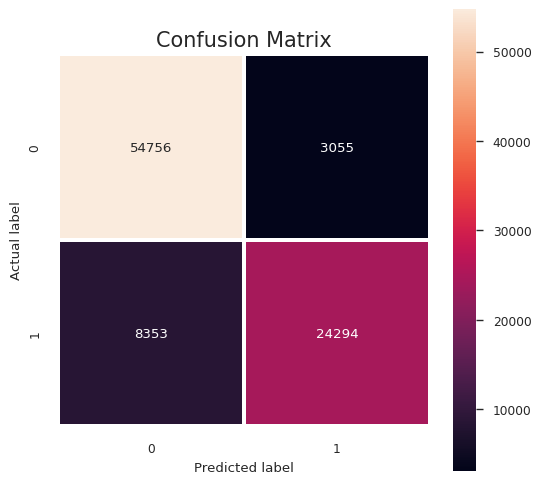

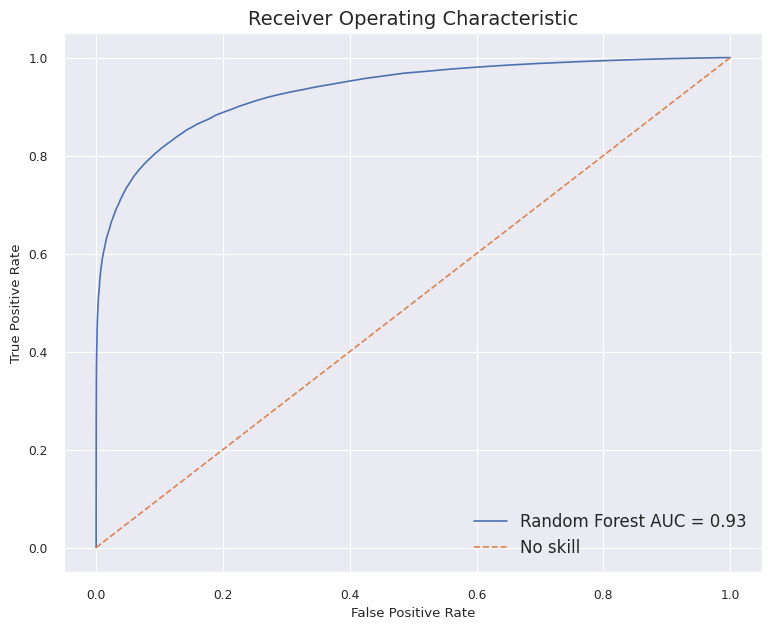

In [21]:
paramsrf = {'class_weight': None, 'criterion': 'entropy', 'n_estimators': 400, "random_state":42}
runner(model = "rf", data = data, optimal = False)

Test Score: 0.8840235247297088


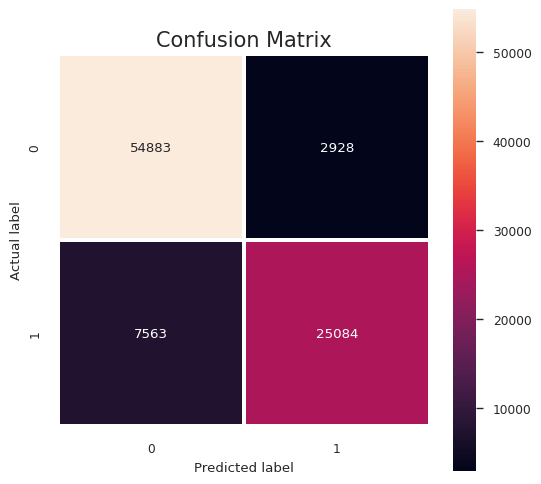

Feature: 0, Score: 0.018
Feature: 1, Score: 0.015
Feature: 2, Score: 0.018
Feature: 3, Score: 0.109
Feature: 4, Score: 0.431
Feature: 5, Score: 0.009
Feature: 6, Score: 0.010
Feature: 7, Score: 0.008
Feature: 8, Score: 0.006
Feature: 9, Score: 0.006
Feature: 10, Score: 0.010
Feature: 11, Score: 0.007
Feature: 12, Score: 0.006
Feature: 13, Score: 0.006
Feature: 14, Score: 0.000
Feature: 15, Score: 0.000
Feature: 16, Score: 0.013
Feature: 17, Score: 0.012
Feature: 18, Score: 0.009
Feature: 19, Score: 0.010
Feature: 20, Score: 0.011
Feature: 21, Score: 0.048
Feature: 22, Score: 0.014
Feature: 23, Score: 0.027
Feature: 24, Score: 0.058
Feature: 25, Score: 0.028
Feature: 26, Score: 0.020
Feature: 27, Score: 0.010
Feature: 28, Score: 0.034
Feature: 29, Score: 0.014
Feature: 30, Score: 0.016
Feature: 31, Score: 0.015


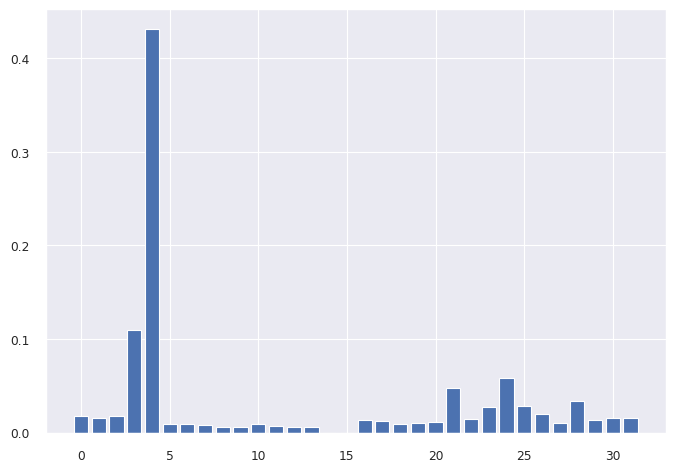

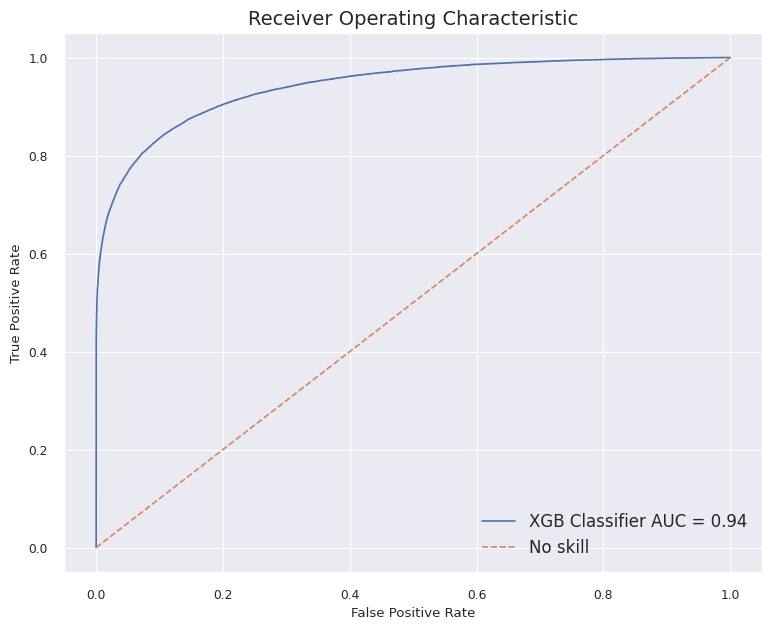

In [22]:
paramsxgb = {'class_weight': None, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, "random_state":42}
runner(model = "xgb", data = data, optimal = False, params = paramsxgb)

Test Score: 0.8641579517566164


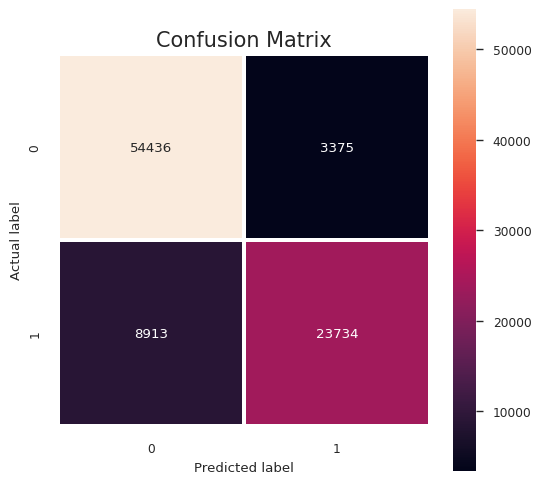

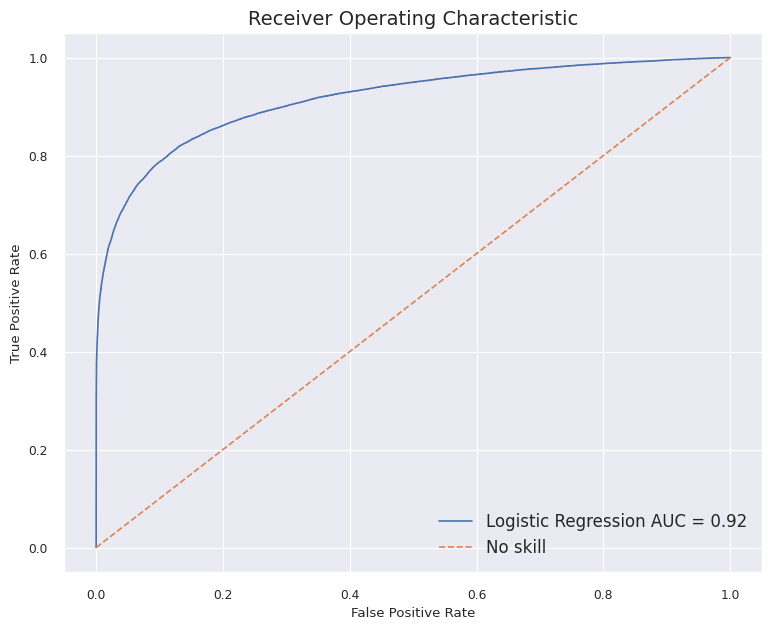

In [25]:
runner(model = "logistic", data = data, optimal = False)

Test Score: 0.8200933029693338


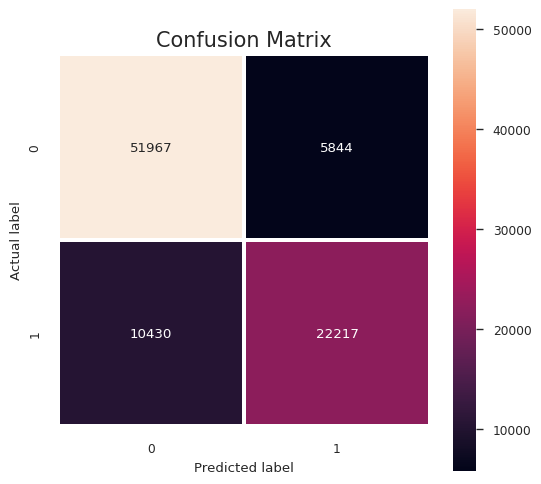

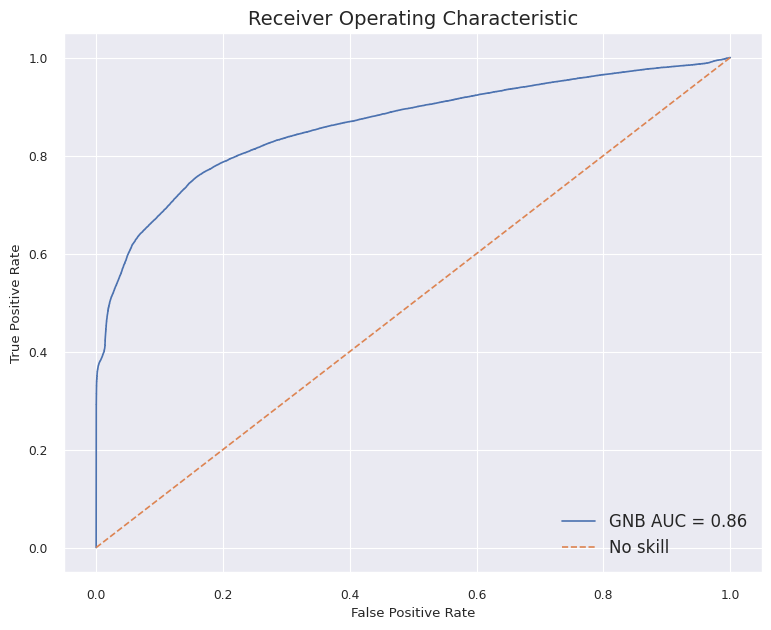

In [26]:
runner(model = "gnb", data = data, optimal = False)

Test Score: 0.8080545667602644


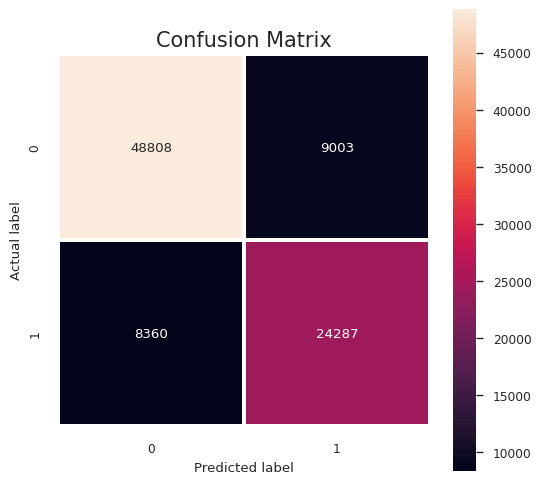

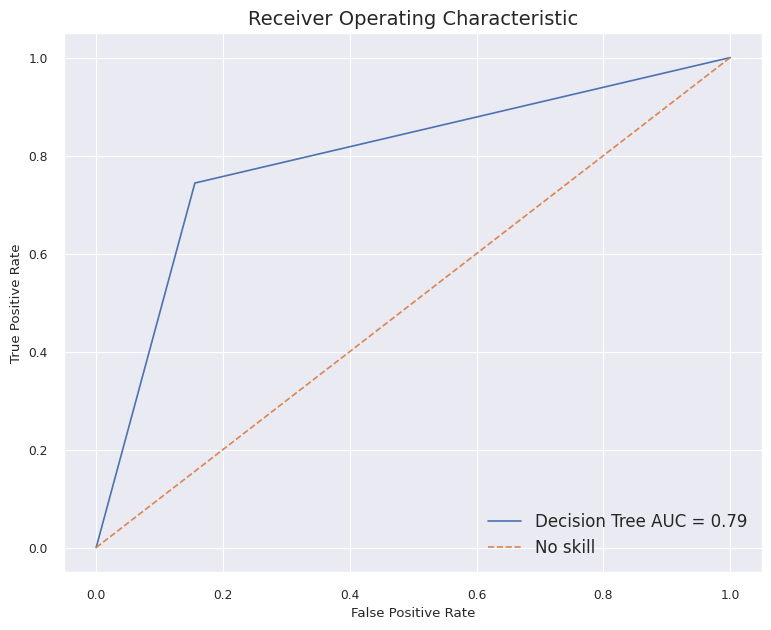

In [24]:
paramsDt = {"random_state" : 42}
runner(model = "dt", data = data, optimal = False, params = paramsDt)

0
Test Score: 0.8641579517566164


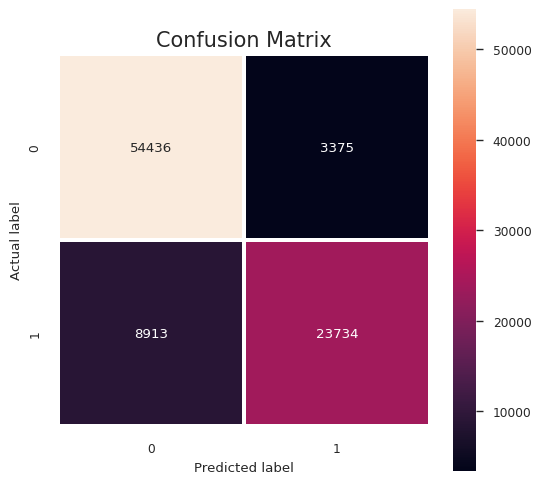

1
Test Score: 0.8200933029693338


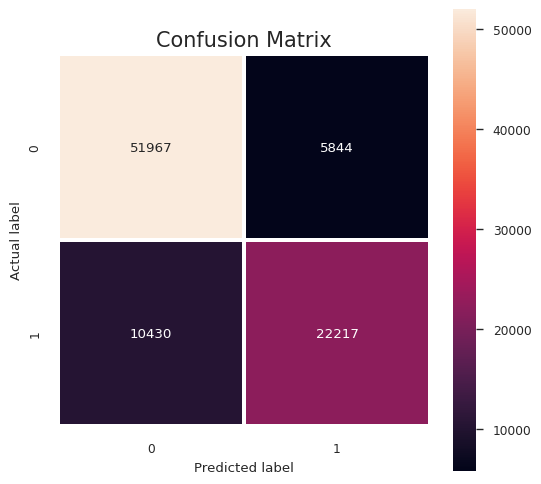

2
Test Score: 0.8840235247297088


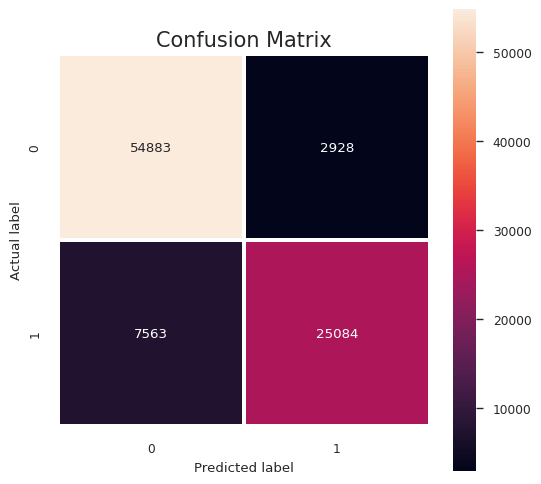

Feature: 0, Score: 0.018
Feature: 1, Score: 0.015
Feature: 2, Score: 0.018
Feature: 3, Score: 0.109
Feature: 4, Score: 0.431
Feature: 5, Score: 0.009
Feature: 6, Score: 0.010
Feature: 7, Score: 0.008
Feature: 8, Score: 0.006
Feature: 9, Score: 0.006
Feature: 10, Score: 0.010
Feature: 11, Score: 0.007
Feature: 12, Score: 0.006
Feature: 13, Score: 0.006
Feature: 14, Score: 0.000
Feature: 15, Score: 0.000
Feature: 16, Score: 0.013
Feature: 17, Score: 0.012
Feature: 18, Score: 0.009
Feature: 19, Score: 0.010
Feature: 20, Score: 0.011
Feature: 21, Score: 0.048
Feature: 22, Score: 0.014
Feature: 23, Score: 0.027
Feature: 24, Score: 0.058
Feature: 25, Score: 0.028
Feature: 26, Score: 0.020
Feature: 27, Score: 0.010
Feature: 28, Score: 0.034
Feature: 29, Score: 0.014
Feature: 30, Score: 0.016
Feature: 31, Score: 0.015


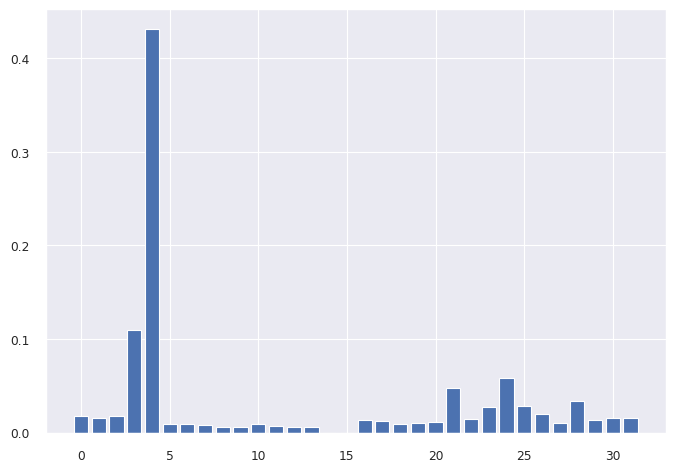

3
Test Score: 0.8080545667602644


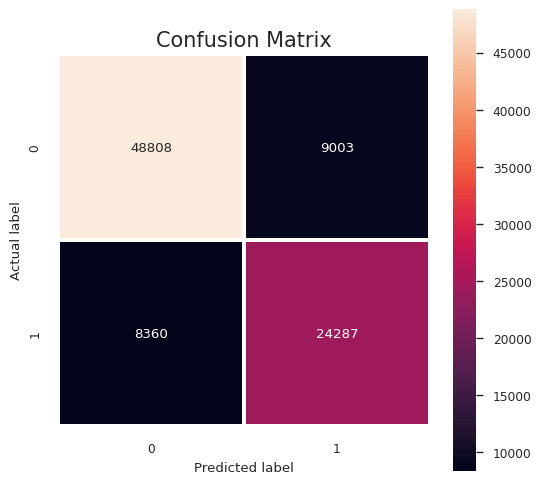

4
Test Score: 0.8746932277963254


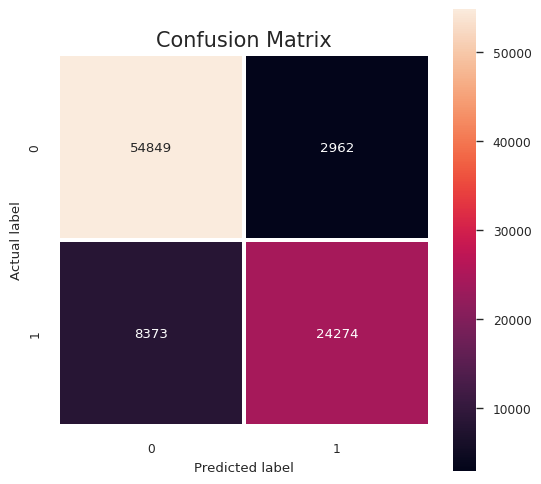

<Figure size 800x550 with 0 Axes>

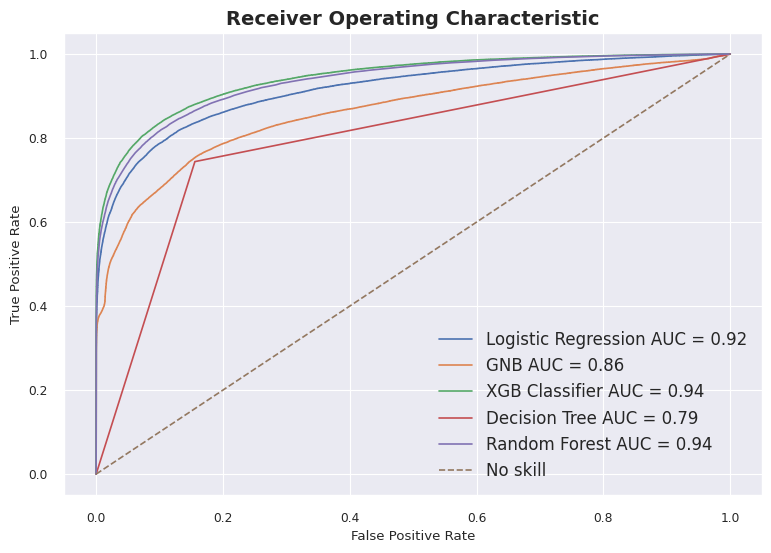

In [27]:
plotAllROC(data)